In [1]:
import pandas as pd
import plotly.graph_objects as go
from pycoingecko import CoinGeckoAPI

In [2]:
# Import Data
cg = CoinGeckoAPI()
raw_data = cg.get_coin_market_chart_by_id(
    'bitcoin', vs_currency='usd', days=15)

In [3]:
# Transform Data
data = pd.DataFrame(raw_data['prices'], columns=['timestamp', 'price'])
data['date'] = pd.to_datetime(data['timestamp'], unit='ms')


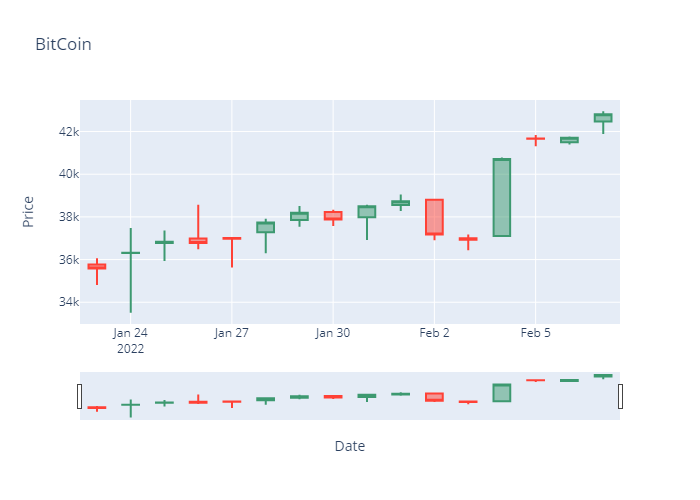

In [4]:
# Create Graphs
chart = data.groupby(data.date.dt.date).agg(
    {'price': ['min', 'max', 'first', 'last']})

fig = go.Figure(data=[
    go.Candlestick(
        x=chart.index,
        open=chart['price']['first'],
        high=chart['price']['max'],
        low=chart['price']['min'],
        close=chart['price']['last']
    )
])

fig.update_layout(xaxis_title='Date', yaxis_title='Price', title='BitCoin')
fig.write_html("bitcoin_variation.html")
fig.show(renderer="png")
